### Import 

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances

from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

### Load Data

In [111]:
df = pd.read_csv('data/Socioeconomic Data/Socioeconomic determinants/socioeconomic determinant for state.csv')
df2 = pd.read_csv('data/csse_covid_19_daily_reports_us/12-31-2020.csv')
df3 = pd.read_csv('data/unemployment_rate/unemployment_all_states_2020.csv')
covid_cases = pd.read_csv('data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
covid_death = pd.read_csv('data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')

### Data Cleaning

In [112]:
df

,FIPS,Name,Postal Code,Area size,Population size,Population density,Senior Population,Young Population,Male Population,White Population,Africa-American Population,Hispanic population,Internet access,High school degree,Bachelor degrees,Median household income,Poverty rate,Uninsured,Household size,House Owner,hospital,hospital bed,ICU bed,ventilator usage,Nurses,Medical Doctors
0,1,Alabama,AL,135767,4903185,36.114704,17.4,18.3,48.3,69.5,27.8,4.5,81.9,12.9,16.3,51734,15.5,9.7,2.60,68.8,119,18611,1637,383,85746,43429
1,2,Alaska,AK,1723337,731545,0.424493,12.4,21.0,52.0,71.4,4.7,7.2,88.0,6.4,18.5,75463,10.1,12.2,2.90,64.7,28,1832,193,41,15487,18418
2,4,Arizona,AZ,295234,7278717,24.654061,18.0,18.7,49.7,81.7,6.0,31.7,87.4,12.4,18.8,62055,13.5,11.3,2.71,65.3,125,18388,1882,427,93928,84130
3,5,Arkansas,AR,137732,3017804,21.910696,17.4,19.2,48.9,79.3,16.7,7.7,80.1,12.5,15.1,48952,16.2,9.1,2.59,65.5,105,12473,914,261,42487,47343
4,6,California,CA,423967,39512223,93.196459,14.8,18.7,49.7,63.6,7.0,39.4,90.0,16.0,21.9,80440,11.8,7.7,3.02,54.9,461,80893,8652,1986,444964,588052
5,8,Colorado,CO,269601,5758736,21.360218,14.7,18.1,50.4,87.3,5.4,21.8,91.2,7.6,26.6,77127,9.3,8.0,2.63,65.9,113,13929,1363,270,77705,97396
6,9,Connecticut,CT,14357,3565287,248.330919,17.6,16.6,48.9,77.8,13.2,16.9,88.8,9.3,22.0,78833,10.0,5.9,2.65,65.0,46,8123,966,193,67924,58009
7,10,Delaware,DE,6446,973764,151.064846,19.5,17.4,48.3,70.5,24.4,9.6,88.9,9.7,19.5,70176,11.3,6.6,2.57,70.3,16,3125,264,105,18674,14242
8,11,District of Columbia,DC,177,705749,3987.282486,12.4,15.9,47.4,45.1,47.2,11.3,87.5,8.1,25.7,92266,13.5,3.5,2.54,41.5,14,4262,407,103,27575,28703
9,12,Florida,FL,170312,21477737,126.108184,20.9,16.4,48.9,77.1,17.6,26.4,87.0,11.6,19.3,59227,12.7,13.2,2.67,66.2,271,62201,6231,1491,316557,283486


In [113]:
df.head()

,FIPS,Name,Postal Code,Area size,Population size,Population density,Senior Population,Young Population,Male Population,White Population,Africa-American Population,Hispanic population,Internet access,High school degree,Bachelor degrees,Median household income,Poverty rate,Uninsured,Household size,House Owner,hospital,hospital bed,ICU bed,ventilator usage,Nurses,Medical Doctors
0,1,Alabama,AL,135767,4903185,36.114704,17.4,18.3,48.3,69.5,27.8,4.5,81.9,12.9,16.3,51734,15.5,9.7,2.60,68.8,119,18611,1637,383,85746,43429
1,2,Alaska,AK,1723337,731545,0.424493,12.4,21.0,52.0,71.4,4.7,7.2,88.0,6.4,18.5,75463,10.1,12.2,2.90,64.7,28,1832,193,41,15487,18418
2,4,Arizona,AZ,295234,7278717,24.654061,18.0,18.7,49.7,81.7,6.0,31.7,87.4,12.4,18.8,62055,13.5,11.3,2.71,65.3,125,18388,1882,427,93928,84130
3,5,Arkansas,AR,137732,3017804,21.910696,17.4,19.2,48.9,79.3,16.7,7.7,80.1,12.5,15.1,48952,16.2,9.1,2.59,65.5,105,12473,914,261,42487,47343
4,6,California,CA,423967,39512223,93.196459,14.8,18.7,49.7,63.6,7.0,39.4,90.0,16.0,21.9,80440,11.8,7.7,3.02,54.9,461,80893,8652,1986,444964,588052


In [114]:
df2.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2021-01-01 05:30:27,32.3182,-86.9023,361226,4827,202137.0,154262.0,1.0,7367.170523,1874000.0,NaN,1.336283,84000001.0,USA,38220.054923,NaN
1,Alaska,US,2021-01-01 05:30:27,61.3707,-152.4044,46986,206,7165.0,39615.0,2.0,6422.844801,1275750.0,NaN,0.438428,84000002.0,USA,174391.185778,NaN
2,American Samoa,US,2021-01-01 05:30:27,-14.2710,-170.1320,0,0,NaN,0.0,60.0,0.000000,2140.0,NaN,NaN,16.0,ASM,3846.084722,NaN
3,Arizona,US,2021-01-01 05:30:27,33.7298,-111.4312,520207,8864,75981.0,435362.0,4.0,7146.960103,2834752.0,NaN,1.703937,84000004.0,USA,38945.764755,NaN
4,Arkansas,US,2021-01-01 05:30:27,34.9697,-92.3731,225138,3676,199247.0,22215.0,5.0,7460.325455,2051488.0,NaN,1.632776,84000005.0,USA,67979.497674,NaN


In [115]:
dmf=df.merge(df2, left_on='Name', right_on='Province_State')

In [116]:
dmf

,FIPS_x,Name,Postal Code,Area size,Population size,Population density,Senior Population,Young Population,Male Population,White Population,Africa-American Population,Hispanic population,Internet access,High school degree,Bachelor degrees,Median household income,Poverty rate,Uninsured,Household size,House Owner,hospital,hospital bed,ICU bed,ventilator usage,Nurses,Medical Doctors,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS_y,Incident_Rate,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,1,Alabama,AL,135767,4903185,36.114704,17.4,18.3,48.3,69.5,27.8,4.5,81.9,12.9,16.3,51734,15.5,9.7,2.60,68.8,119,18611,1637,383,85746,43429,Alabama,US,2021-01-01 05:30:27,32.3182,-86.9023,361226,4827,202137.0,154262.0,1.0,7367.170523,1874000.0,NaN,1.336283,84000001.0,USA,38220.054923,NaN
1,2,Alaska,AK,1723337,731545,0.424493,12.4,21.0,52.0,71.4,4.7,7.2,88.0,6.4,18.5,75463,10.1,12.2,2.90,64.7,28,1832,193,41,15487,18418,Alaska,US,2021-01-01 05:30:27,61.3707,-152.4044,46986,206,7165.0,39615.0,2.0,6422.844801,1275750.0,NaN,0.438428,84000002.0,USA,174391.185778,NaN
2,4,Arizona,AZ,295234,7278717,24.654061,18.0,18.7,49.7,81.7,6.0,31.7,87.4,12.4,18.8,62055,13.5,11.3,2.71,65.3,125,18388,1882,427,93928,84130,Arizona,US,2021-01-01 05:30:27,33.7298,-111.4312,520207,8864,75981.0,435362.0,4.0,7146.960103,2834752.0,NaN,1.703937,84000004.0,USA,38945.764755,NaN
3,5,Arkansas,AR,137732,3017804,21.910696,17.4,19.2,48.9,79.3,16.7,7.7,80.1,12.5,15.1,48952,16.2,9.1,2.59,65.5,105,12473,914,261,42487,47343,Arkansas,US,2021-01-01 05:30:27,34.9697,-92.3731,225138,3676,199247.0,22215.0,5.0,7460.325455,2051488.0,NaN,1.632776,84000005.0,USA,67979.497674,NaN
4,6,California,CA,423967,39512223,93.196459,14.8,18.7,49.7,63.6,7.0,39.4,90.0,16.0,21.9,80440,11.8,7.7,3.02,54.9,461,80893,8652,1986,444964,588052,California,US,2021-01-01 05:30:27,36.1162,-119.6816,2325599,25986,NaN,2265110.0,6.0,5798.223502,32855482.0,NaN,1.130376,84000006.0,USA,83152.704418,NaN
5,8,Colorado,CO,269601,5758736,21.360218,14.7,18.1,50.4,87.3,5.4,21.8,91.2,7.6,26.6,77127,9.3,8.0,2.63,65.9,113,13929,1363,270,77705,97396,Colorado,US,2021-01-01 05:30:27,39.0598,-105.3111,334097,4814,17971.0,311312.0,8.0,5801.568261,4406667.0,NaN,1.440899,84000008.0,USA,76521.427619,NaN
6,9,Connecticut,CT,14357,3565287,248.330919,17.6,16.6,48.9,77.8,13.2,16.9,88.8,9.3,22.0,78833,10.0,5.9,2.65,65.0,46,8123,966,193,67924,58009,Connecticut,US,2021-01-01 05:30:27,41.5978,-72.7554,185708,5995,9800.0,169913.0,9.0,5208.781229,4320693.0,NaN,3.228186,84000009.0,USA,121187.803394,NaN
7,10,Delaware,DE,6446,973764,151.064846,19.5,17.4,48.3,70.5,24.4,9.6,88.9,9.7,19.5,70176,11.3,6.6,2.57,70.3,16,3125,264,105,18674,14242,Delaware,US,2021-01-01 05:30:27,39.3185,-75.5071,57456,1014,18851.0,37679.0,10.0,5900.402972,978204.0,NaN,1.611668,84000010.0,USA,100455.962636,NaN
8,11,District of Columbia,DC,177,705749,3987.282486,12.4,15.9,47.4,45.1,47.2,11.3,87.5,8.1,25.7,92266,13.5,3.5,2.54,41.5,14,4262,407,103,27575,28703,District of Columbia,US,2021-01-01 05:30:27,38.8974,-77.0268,28983,786,20770.0,7427.0,11.0,4106.700824,897439.0,NaN,2.711935,84000011.0,USA,127161.214539,NaN
9,12,Florida,FL,170312,21477737,126.108184,20.9,16.4,48.9,77.1,17.6,26.4,87.0,11.6,19.3,59227,12.7,13.2,2.67,66.2,271,62201,6231,1491,316557,283486,Florida,US,2021-01-01 05:30:27,27.7663,-81.6868,1323315,21673,NaN,1301642.0,12.0,6161.333478,15703599.0,NaN,1.637781,84000012.0,USA,73115.705812,NaN


In [117]:
# Drop unnecessary columns
dmf.drop(columns = ['FIPS_x','Province_State','Country_Region',
                    'Last_Update','Lat','Long_','FIPS_y','People_Hospitalized',
                    'UID','ISO3','Hospitalization_Rate'], inplace = True)

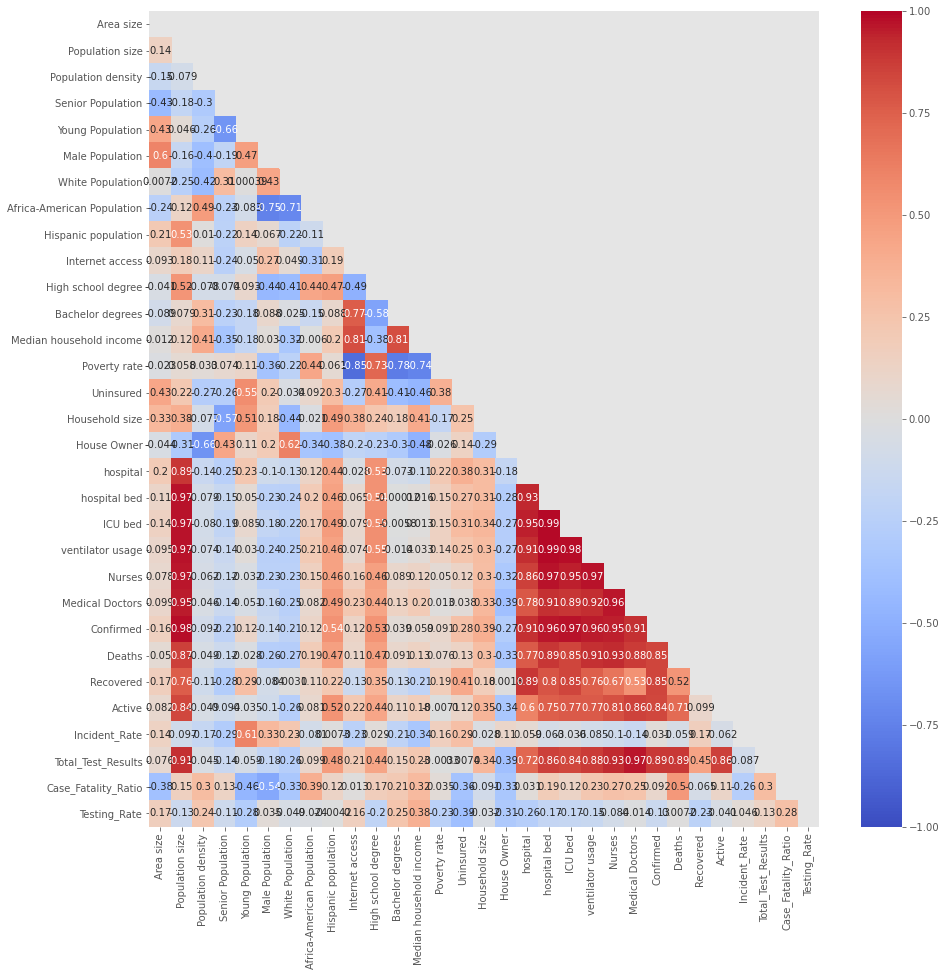

In [118]:
corr = dmf.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True,
            cmap='coolwarm', vmin=-1, vmax=1, mask=mask);

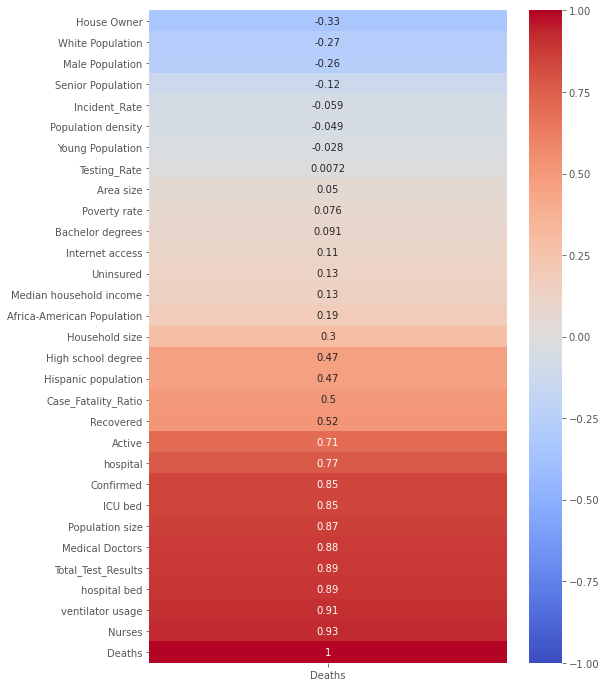

In [119]:
plt.figure(figsize=(8, 12))
sns.heatmap(dmf.corr()[['Deaths']].sort_values('Deaths'),
            annot=True,
            cmap='coolwarm',
            vmin=-1, 
            vmax=1);

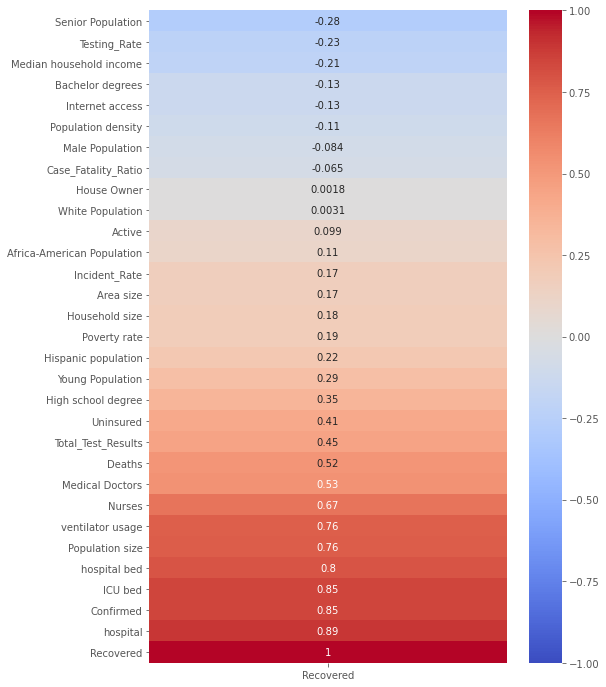

In [120]:
plt.figure(figsize=(8, 12))
sns.heatmap(dmf.corr()[['Recovered']].sort_values('Recovered'),
            annot=True,
            cmap='coolwarm',
            vmin=-1, 
            vmax=1);

In [121]:
# create covid-19 cases monthly columns
covid_cases_states = covid_cases.groupby('Province_State').agg('sum')
covid_cases_states = covid_cases_states[['1/31/20','2/29/20','3/31/20','4/30/20','5/31/20',
                                                '6/30/20','7/31/20','8/31/20','9/30/20','10/31/20',
                                                '11/30/20','12/31/20']]

covid_cases_states['cases1'] = covid_cases_states.iloc[:,0]

for i in range(1,12):
    col_name = 'cases'+str(i+1)
    covid_cases_states[col_name] = covid_cases_states.iloc[:,i]-covid_cases_states.iloc[:,i-1]

# Add total cases column
covid_cases_states['casestotal'] = covid_cases_states['12/31/20']

# Drop unwanted columns
covid_cases_states.drop(columns = ['1/31/20','2/29/20','3/31/20','4/30/20','5/31/20',
                                                '6/30/20','7/31/20','8/31/20','9/30/20','10/31/20',
                                                '11/30/20','12/31/20'], inplace = True)

In [122]:
# create death monthly columns
covid_death_states = covid_death.groupby('Province_State').agg('sum')
covid_death_states = covid_death_states[['1/31/20','2/29/20','3/31/20','4/30/20','5/31/20',
                                                '6/30/20','7/31/20','8/31/20','9/30/20','10/31/20',
                                                '11/30/20','12/31/20']]

covid_death_states['death1'] = covid_death_states.iloc[:,0]
for i in range(1,12):
    col_name = 'death'+str(i+1)
    covid_death_states[col_name] = covid_death_states.iloc[:,i]-covid_death_states.iloc[:,i-1]

# Add total death column
covid_death_states['deathtotal'] = covid_death_states['12/31/20']

# Drop unwanted columns
covid_death_states.drop(columns = ['1/31/20','2/29/20','3/31/20','4/30/20','5/31/20',
                                                '6/30/20','7/31/20','8/31/20','9/30/20','10/31/20',
                                                '11/30/20','12/31/20'], inplace = True)


In [123]:
# drop non-states
covid_cases_states.drop(covid_cases_states[covid_cases_states.index.isin(['American Samoa','Diamond Princess','Grand Princess','Northern Mariana Islands','Guam','Virgin Islands'])].index, inplace = True )
covid_death_states.drop(covid_death_states[covid_death_states.index.isin(['American Samoa','Diamond Princess','Grand Princess','Northern Mariana Islands','Guam','Virgin Islands'])].index, inplace = True )

In [124]:
covid_cases_states.head()

,cases1,cases2,cases3,cases4,cases5,cases6,cases7,cases8,cases9,cases10,cases11,cases12,casestotal
Province_State,,,,,,,,,,,,,
Alabama,0,0,1063,6124,11013,20277,49789,38234,28272,38841,55911,111702,361226
Alaska,0,0,129,231,124,658,2574,2457,2672,7510,16221,14410,46986
Arizona,1,0,1288,6366,12281,59292,94782,27825,16672,27439,80871,193390,520207
Arkansas,0,0,523,2758,3972,13524,21734,18713,22473,28493,45169,67779,225138
California,3,9,8221,42479,62207,126805,267482,207366,107619,114064,308697,1080647,2325599


In [125]:
covid_death_states.head()


,death1,death2,death3,death4,death5,death6,death7,death8,death9,death10,death11,death12,deathtotal
Province_State,,,,,,,,,,,,,
Alabama,0,0,23,249,358,320,630,602,358,427,611,1249,4827
Alaska,0,0,3,6,1,4,9,14,19,26,39,85,206
Arizona,0,0,25,295,587,738,2049,1335,621,329,660,2225,8864
Arkansas,0,0,8,53,72,137,183,344,572,556,577,1174,3676
California,0,0,173,1858,2141,1910,3132,3808,2863,1774,1555,6772,25986


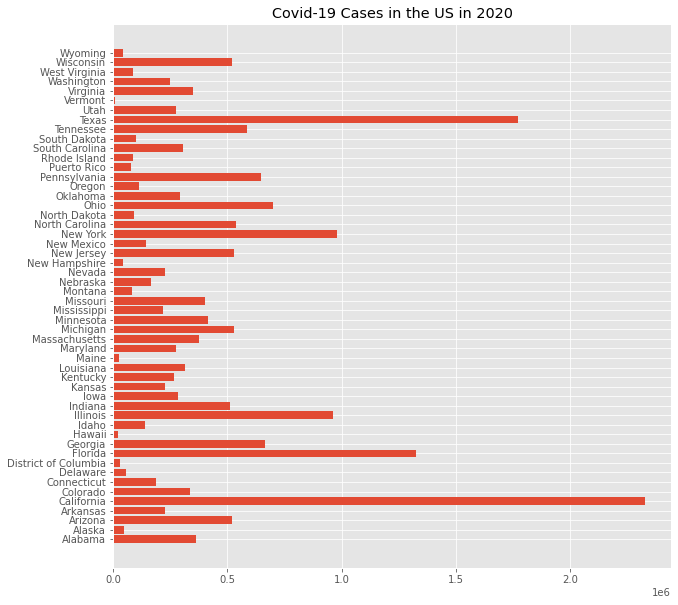

In [126]:
plt.figure(figsize=(10,10)) 
plt.barh(covid_cases_states.index, covid_cases_states['casestotal'])
plt.title('Covid-19 Cases in the US in 2020');

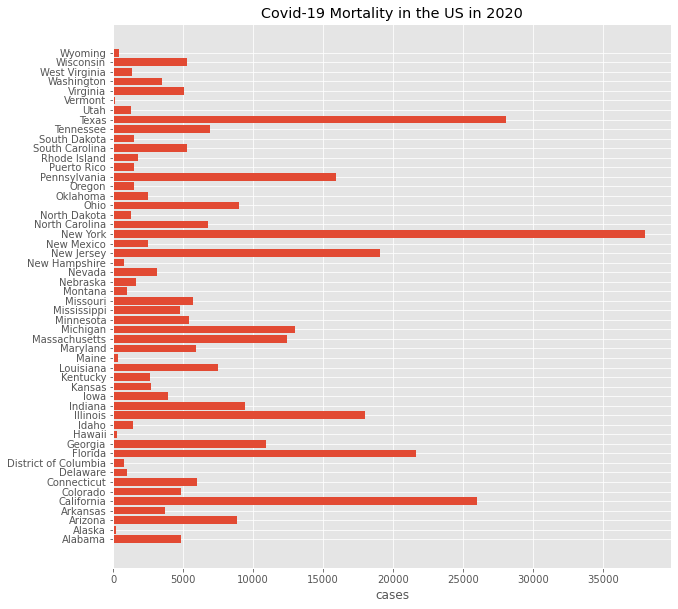

In [127]:
plt.figure(figsize=(10,10)) 
plt.barh(covid_death_states.index, covid_death_states['deathtotal'])
plt.xlabel('cases')
plt.title('Covid-19 Mortality in the US in 2020');

In [128]:
covid_df = pd.merge(covid_cases_states, covid_death_states, left_index = True, right_index= True, how='left')

In [129]:
covid_df.head()

,cases1,cases2,cases3,cases4,cases5,cases6,cases7,cases8,cases9,cases10,cases11,cases12,casestotal,death1,death2,death3,death4,death5,death6,death7,death8,death9,death10,death11,death12,deathtotal
Province_State,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,1063,6124,11013,20277,49789,38234,28272,38841,55911,111702,361226,0,0,23,249,358,320,630,602,358,427,611,1249,4827
Alaska,0,0,129,231,124,658,2574,2457,2672,7510,16221,14410,46986,0,0,3,6,1,4,9,14,19,26,39,85,206
Arizona,1,0,1288,6366,12281,59292,94782,27825,16672,27439,80871,193390,520207,0,0,25,295,587,738,2049,1335,621,329,660,2225,8864
Arkansas,0,0,523,2758,3972,13524,21734,18713,22473,28493,45169,67779,225138,0,0,8,53,72,137,183,344,572,556,577,1174,3676
California,3,9,8221,42479,62207,126805,267482,207366,107619,114064,308697,1080647,2325599,0,0,173,1858,2141,1910,3132,3808,2863,1774,1555,6772,25986


In [130]:
df3['year_rate'] = round(df3.mean(axis=1),2)

In [131]:
df3['state'][df3['state'] =="DC"] = 'District of Columbia'

KeyError: 'state'

In [ ]:
df3

In [ ]:
plt.figure(figsize=(10,10)) 
plt.barh(df3.sort_values(by = 'year_rate', ascending= False)['state'], df3.sort_values(by = 'year_rate', ascending= False)['year_rate'])
plt.xlabel('Unemployment Rate')
plt.title('Unemployment Rate in the US in 2020');

In [ ]:
covid_df['covid_state'] = covid_df.index

In [ ]:
covid_df = covid_df[['covid_state'] + [ col for col in covid_df.columns if col != 'covid_state' ] ]

In [ ]:
covid_df

In [ ]:
covid_df.reset_index(drop=True, inplace=True)

In [ ]:
unemp_covid_df = pd.concat([covid_df,df3], axis= 1)

In [ ]:
unemp_covid_df.drop(columns= ['Unnamed: 0','state'], inplace = True)

In [ ]:
plt.figure(figsize=(8, 15))
sns.heatmap(unemp_covid_df.corr()[['deathtotal']].sort_values('deathtotal'),
            annot=True,
            cmap='coolwarm',
            vmin=-1, 
            vmax=1);

In [ ]:
corr = unemp_covid_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(9, 9))
sns.heatmap(corr, annot=True,
            cmap='coolwarm', vmin=-1, vmax=1, mask=mask)

In [ ]:
unemp_covid_df.to_csv('data/yun_data/output/unemployment_covid_2020.csv', index = False)
covid_df.to_csv('data/yun_data/output/covid_monthly_2020.csv',index = False)

### Modeling

In [ ]:
dmf.info()

In [132]:
# Death rate?
dmf['death_rate'] = dmf['Deaths']/dmf['Confirmed']

In [133]:
# Data for clustering
X = dmf.drop(columns = ['Name','Postal Code','Confirmed','Deaths','Recovered','Active',
                        'Incident_Rate','Total_Test_Results',
                         'Case_Fatality_Ratio','Testing_Rate'])
y = dmf['death_rate']

In [134]:
#fit the data
model = KMeans()
model.fit(X)

KMeans()

In [135]:
# Get the labels and centroids for our first clustering model
labels = model.labels_
centroids = model.cluster_centers_

print("Predicted clusters to points: ", labels)
print("Location of centroids: ")
print(centroids)

Predicted clusters to points:  [5 1 7 5 2 7 5 1 1 4 3 1 1 0 7 5 5 5 5 1 7 7 3 7 5 7 1 1 5 1 3 1 4 3 1 0 5
 5 0 1 7 1 7 6 5 1 3 7 1 7 1]
Location of centroids: 
[[1.28457667e+05 1.23876367e+07 9.74972904e+01 1.74333333e+01
  1.78333333e+01 4.90333333e+01 7.97333333e+01 1.42333333e+01
  9.76666667e+00 8.59000000e+01 9.46666667e+00 1.98000000e+01
  6.37640000e+04 1.22000000e+01 6.60000000e+00 2.58666667e+00
  6.68000000e+01 2.35000000e+02 4.13536667e+04 3.80100000e+03
  9.46666667e+02 2.14874000e+05 1.83610333e+05 1.87220689e-02]
 [2.32154750e+05 1.19493188e+06 2.88515087e+02 1.76000000e+01
  1.79000000e+01 4.97875000e+01 8.18625000e+01 7.62500000e+00
  9.95625000e+00 8.62000000e+01 8.25625000e+00 2.03625000e+01
  6.64576875e+04 1.14937500e+01 7.68125000e+00 2.60375000e+00
  6.63625000e+01 4.25625000e+01 3.74581250e+03 3.71312500e+02
  9.96250000e+01 2.21650000e+04 1.95260625e+04 1.47698551e-02]
 [4.23967000e+05 3.95122230e+07 9.31964587e+01 1.48000000e+01
  1.87000000e+01 4.97000000e+01 

In [136]:
#create third column
dmf['labels_result'] = labels
dmf.head()

,Name,Postal Code,Area size,Population size,Population density,Senior Population,Young Population,Male Population,White Population,Africa-American Population,Hispanic population,Internet access,High school degree,Bachelor degrees,Median household income,Poverty rate,Uninsured,Household size,House Owner,hospital,hospital bed,ICU bed,ventilator usage,Nurses,Medical Doctors,Confirmed,Deaths,Recovered,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,death_rate,labels_result
0,Alabama,AL,135767,4903185,36.114704,17.4,18.3,48.3,69.5,27.8,4.5,81.9,12.9,16.3,51734,15.5,9.7,2.60,68.8,119,18611,1637,383,85746,43429,361226,4827,202137.0,154262.0,7367.170523,1874000.0,1.336283,38220.054923,0.013363,5
1,Alaska,AK,1723337,731545,0.424493,12.4,21.0,52.0,71.4,4.7,7.2,88.0,6.4,18.5,75463,10.1,12.2,2.90,64.7,28,1832,193,41,15487,18418,46986,206,7165.0,39615.0,6422.844801,1275750.0,0.438428,174391.185778,0.004384,1
2,Arizona,AZ,295234,7278717,24.654061,18.0,18.7,49.7,81.7,6.0,31.7,87.4,12.4,18.8,62055,13.5,11.3,2.71,65.3,125,18388,1882,427,93928,84130,520207,8864,75981.0,435362.0,7146.960103,2834752.0,1.703937,38945.764755,0.017039,7
3,Arkansas,AR,137732,3017804,21.910696,17.4,19.2,48.9,79.3,16.7,7.7,80.1,12.5,15.1,48952,16.2,9.1,2.59,65.5,105,12473,914,261,42487,47343,225138,3676,199247.0,22215.0,7460.325455,2051488.0,1.632776,67979.497674,0.016328,5
4,California,CA,423967,39512223,93.196459,14.8,18.7,49.7,63.6,7.0,39.4,90.0,16.0,21.9,80440,11.8,7.7,3.02,54.9,461,80893,8652,1986,444964,588052,2325599,25986,NaN,2265110.0,5798.223502,32855482.0,1.130376,83152.704418,0.011174,2


In [137]:
dmf.labels_result.value_counts()

1    16
5    12
7    11
3     5
0     3
4     2
6     1
2     1
Name: labels_result, dtype: int64

In [138]:
# Compute the silouette score and visually examine the results of the 8 clusters.
silhouette_score(X, labels)

0.5789603745713443

In [ ]:
dmf.columns

KeyboardInterrupt: 

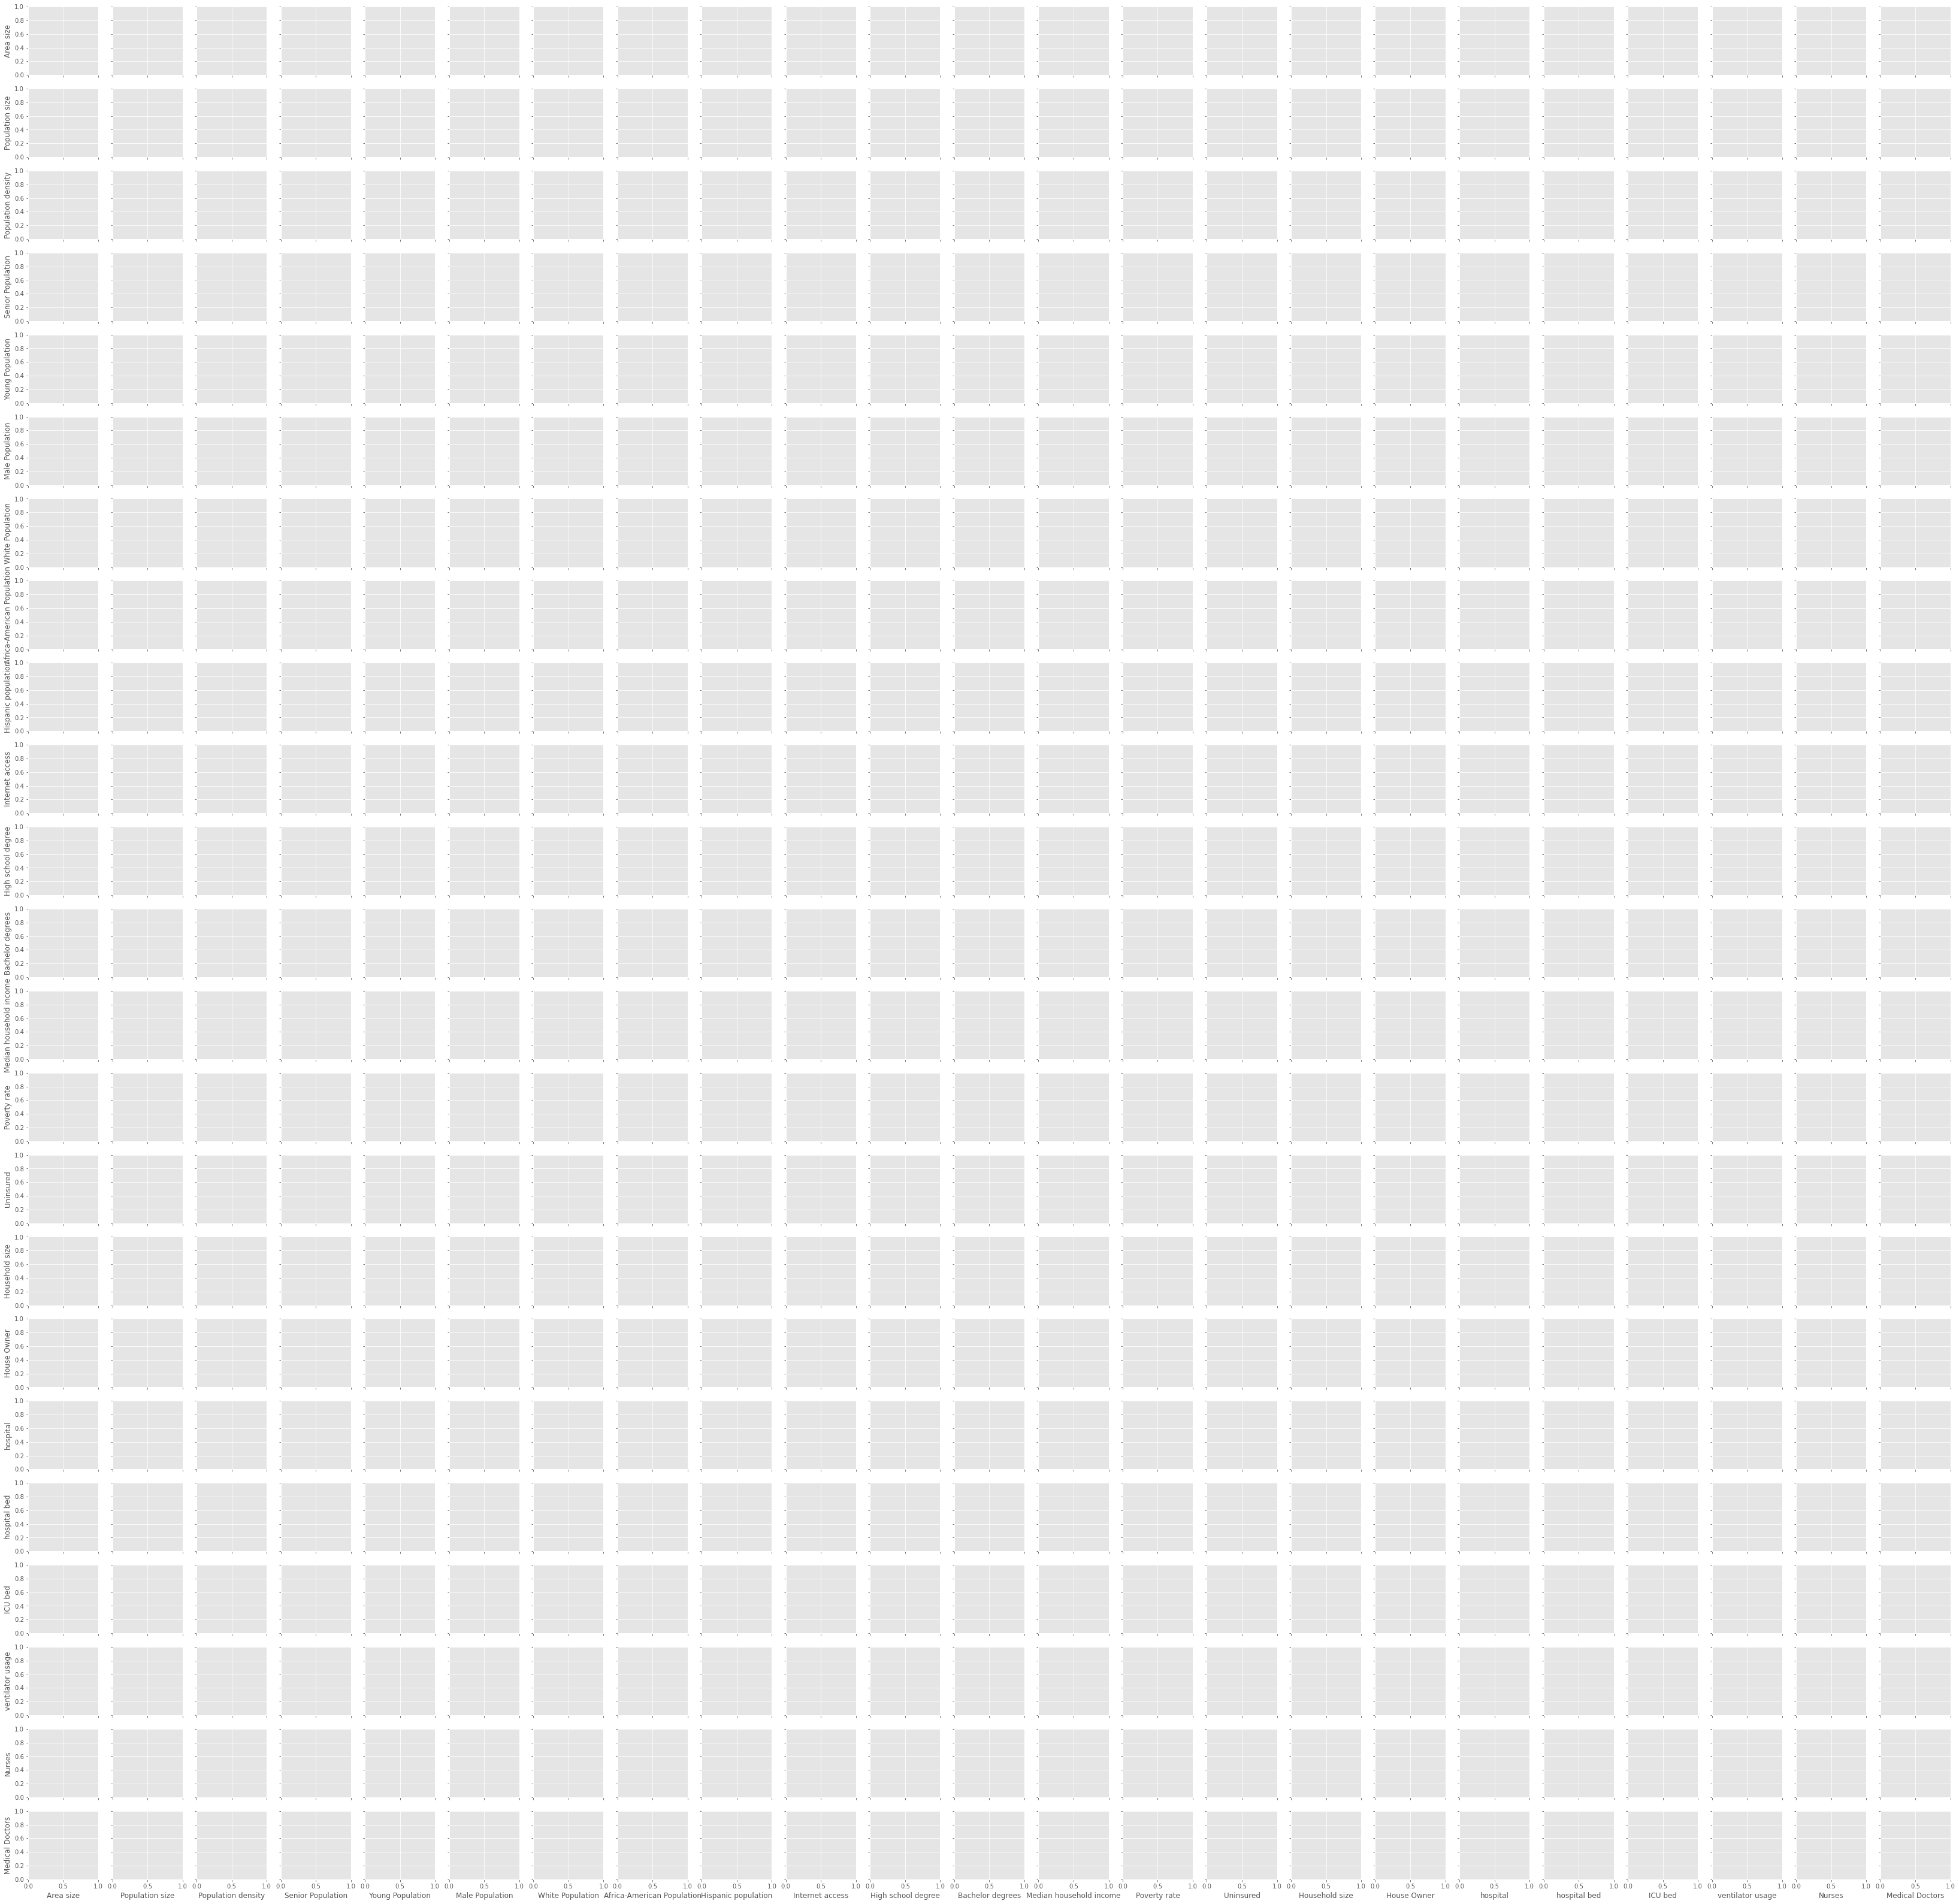

In [143]:
# visually examine the cluster that have been created
k8 = dmf.drop(['Name', 'Postal Code','Confirmed','Deaths', 'Recovered','Active',
       'Incident_Rate','Total_Test_Results', 'Case_Fatality_Ratio',
       'Testing_Rate', 'death_rate', 'labels_result'], axis=1)
k8['clusters']=labels

sns.pairplot(data=k8, hue='clusters')

In [161]:
dmf.columns

Index(['Name', 'Postal Code', 'Area size', 'Population size',
       'Population density', 'Senior Population', 'Young Population',
       'Male Population', 'White Population', 'Africa-American Population',
       'Hispanic population', 'Internet access', 'High school degree',
       'Bachelor degrees', 'Median household income', 'Poverty rate',
       'Uninsured', 'Household size', 'House Owner', 'hospital',
       'hospital bed', 'ICU bed', 'ventilator usage', 'Nurses',
       'Medical Doctors', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Incident_Rate', 'Total_Test_Results', 'Case_Fatality_Ratio',
       'Testing_Rate', 'death_rate', 'labels_result'],
      dtype='object')

<ipython-input-144-3298d836cb2f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k8['clusters']=labels
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  

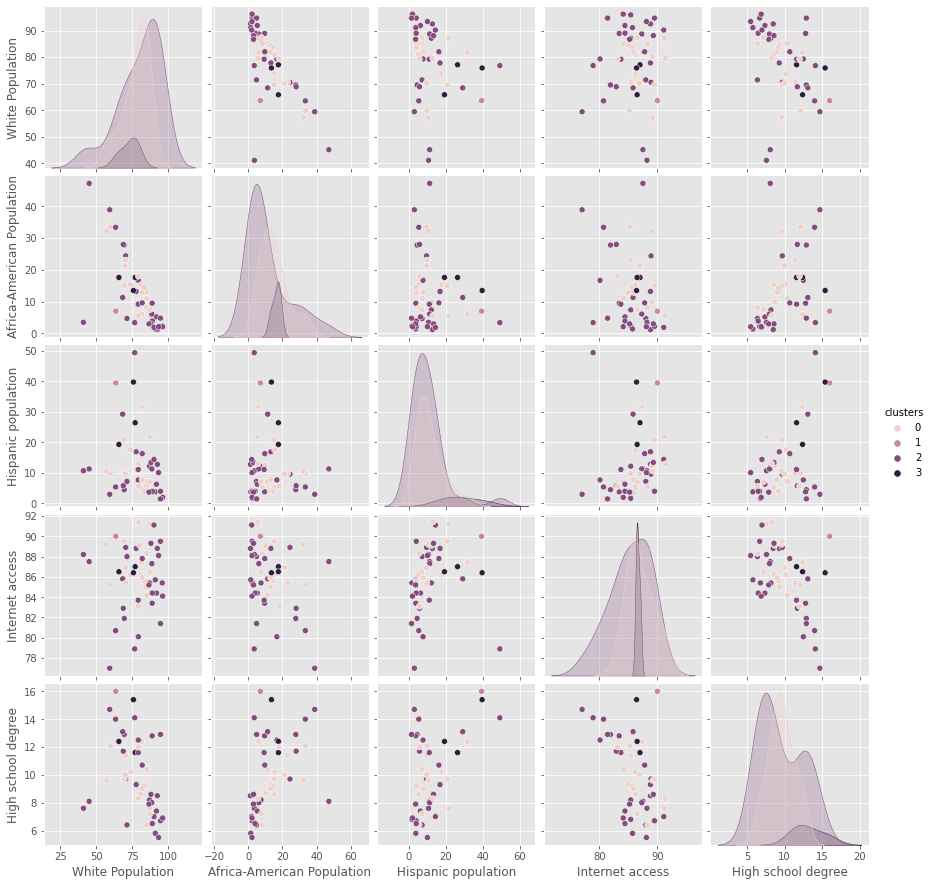

In [144]:
# visually examine the cluster that have been created
k8 = dmf[['White Population', 'Africa-American Population',
       'Hispanic population', 'Internet access', 'High school degree']]
k8['clusters']=labels

sns.pairplot(data=k8, hue='clusters')

### n_cluster = 2

In [156]:
#fit the data
model = KMeans(n_clusters = 2)
model.fit(X)

labels = model.labels_
centroids = model.cluster_centers_

print("Predicted clusters to points: ", labels)
print("Location of centroids: ")
print(centroids)

Predicted clusters to points:  [0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
Location of centroids: 
[[1.78771936e+05 4.65532172e+06 1.46512480e+02 1.69382979e+01
  1.83489362e+01 4.93872340e+01 7.91425532e+01 1.26617021e+01
  1.05787234e+01 8.59574468e+01 9.53191489e+00 2.00191489e+01
  6.52184681e+04 1.21191489e+01 8.16808511e+00 2.63468085e+00
  6.64021277e+01 1.02425532e+02 1.43016809e+04 1.35125532e+03
  3.49000000e+02 7.39837660e+04 6.59652553e+04 1.62668757e-02]
 [3.57809500e+05 2.73598505e+07 9.96660367e+01 1.63750000e+01
  1.83750000e+01 4.92000000e+01 7.06000000e+01 1.39250000e+01
  3.12000000e+01 8.74750000e+01 1.38500000e+01 2.06000000e+01
  6.89522500e+04 1.27750000e+01 1.11250000e+01 2.84750000e+00
  5.91250000e+01 3.95750000e+02 6.99370000e+04 6.95800000e+03
  1.68875000e+03 3.64235500e+05 3.87718000e+05 2.05474136e-02]]


In [157]:
silhouette_score(X, labels)

0.7857204286118259

<ipython-input-158-3298d836cb2f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k8['clusters']=labels


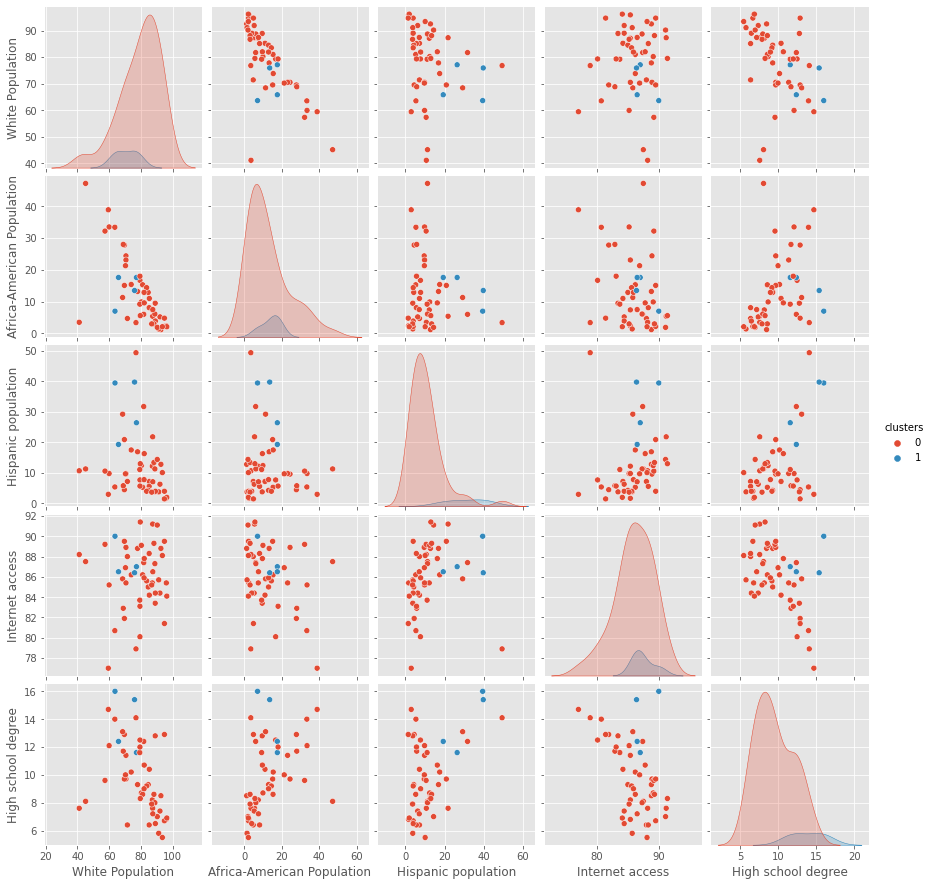

In [158]:
# visually examine the cluster that have been created
k8 = dmf[['White Population', 'Africa-American Population',
       'Hispanic population', 'Internet access', 'High school degree']]
k8['clusters']=labels

sns.pairplot(data=k8, hue='clusters');

### n_cluster = 3

In [159]:
#fit the data
model = KMeans(n_clusters = 3)
model.fit(X)

labels = model.labels_
centroids = model.cluster_centers_

print("Predicted clusters to points: ", labels)
print("Location of centroids: ")
print(centroids)

Predicted clusters to points:  [0 0 2 0 1 2 0 0 0 1 2 0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 0 0 0 2 0 1 2 0 2 0
 0 2 0 0 0 2 1 0 0 2 2 0 2 0]
Location of centroids: 
[[1.98343517e+05 2.35778352e+06 1.78773416e+02 1.71482759e+01
  1.84344828e+01 4.95206897e+01 8.00655172e+01 1.12931034e+01
  1.01034483e+01 8.53000000e+01 9.51379310e+00 1.93724138e+01
  6.31920690e+04 1.25827586e+01 8.39655172e+00 2.63344828e+00
  6.63724138e+01 7.28965517e+01 8.04344828e+03 7.56793103e+02
  1.90103448e+02 3.88054483e+04 3.37656897e+04 1.50791381e-02]
 [3.57809500e+05 2.73598505e+07 9.96660367e+01 1.63750000e+01
  1.83750000e+01 4.92000000e+01 7.06000000e+01 1.39250000e+01
  3.12000000e+01 8.74750000e+01 1.38500000e+01 2.06000000e+01
  6.89522500e+04 1.27750000e+01 1.11250000e+01 2.84750000e+00
  5.91250000e+01 3.95750000e+02 6.99370000e+04 6.95800000e+03
  1.68875000e+03 3.64235500e+05 3.87718000e+05 2.05474136e-02]
 [1.47239944e+05 8.35691106e+06 9.45365275e+01 1.66000000e+01
  1.82111111e+01 4.91722222e+01 

In [160]:
silhouette_score(X, labels)

0.5813696246735178

### n_cluster = 4

In [149]:
#fit the data
model = KMeans(n_clusters = 4)
model.fit(X)

labels = model.labels_
centroids = model.cluster_centers_

print("Predicted clusters to points: ", labels)
print("Location of centroids: ")
print(centroids)

Predicted clusters to points:  [2 2 0 2 3 0 2 2 2 1 0 2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 2 2 2 0 2 1 0 2 0 2
 2 0 2 2 2 0 1 2 2 0 0 2 0 2]
Location of centroids: 
[[1.47239944e+05 8.35691106e+06 9.45365275e+01 1.66000000e+01
  1.82111111e+01 4.91722222e+01 7.76555556e+01 1.48666667e+01
  1.13444444e+01 8.70166667e+01 9.56111111e+00 2.10611111e+01
  6.84832222e+04 1.13722222e+01 7.80000000e+00 2.63666667e+00
  6.64500000e+01 1.50000000e+02 2.43843889e+04 2.30900000e+03
  6.05000000e+02 1.30659944e+05 1.17842333e+05 1.81804531e-02]
 [3.35757000e+05 2.33090597e+07 1.01822563e+02 1.69000000e+01
  1.82666667e+01 4.90333333e+01 7.29333333e+01 1.62333333e+01
  2.84666667e+01 8.66333333e+01 1.31333333e+01 2.01666667e+01
  6.51230000e+04 1.31000000e+01 1.22666667e+01 2.79000000e+00
  6.05333333e+01 3.74000000e+02 6.62850000e+04 6.39333333e+03
  1.58966667e+03 3.37326000e+05 3.20940000e+05 2.36719197e-02]
 [1.98343517e+05 2.35778352e+06 1.78773416e+02 1.71482759e+01
  1.84344828e+01 4.95206897e+01 

In [150]:
silhouette_score(X, labels)

0.579780385337331

### n_cluster = 6

In [151]:
#fit the data
model = KMeans(n_clusters = 6)
model.fit(X)

labels = model.labels_
centroids = model.cluster_centers_

print("Predicted clusters to points: ", labels)
print("Location of centroids: ")
print(centroids)

Predicted clusters to points:  [2 0 2 0 3 2 0 0 0 1 4 0 0 4 2 0 0 2 2 0 2 2 4 2 0 2 0 0 0 0 4 0 1 4 0 4 2
 2 4 0 2 0 2 5 0 0 4 2 0 2 0]
Location of centroids: 
[[2.11178739e+05 1.78402817e+06 2.16124511e+02 1.71521739e+01
  1.84130435e+01 4.96695652e+01 8.10391304e+01 9.41739130e+00
  1.08260870e+01 8.57304348e+01 8.88260870e+00 1.99173913e+01
  6.52058261e+04 1.19000000e+01 8.09565217e+00 2.63869565e+00
  6.62521739e+01 5.87391304e+01 5.90843478e+03 5.53913043e+02
  1.40086957e+02 3.08902174e+04 2.66221304e+04 1.52847436e-02]
 [1.55804500e+05 2.04656490e+07 1.31893349e+02 1.89000000e+01
  1.68000000e+01 4.87500000e+01 7.14500000e+01 1.76000000e+01
  2.28500000e+01 8.67500000e+01 1.20000000e+01 2.02500000e+01
  6.56675000e+04 1.28500000e+01 9.20000000e+00 2.69000000e+00
  5.98500000e+01 2.47500000e+02 5.84720000e+04 5.23050000e+03
  1.42400000e+03 3.37729000e+05 3.45627500e+05 2.75920816e-02]
 [1.55164438e+05 5.75590562e+06 6.05260080e+01 1.67562500e+01
  1.83687500e+01 4.91937500e+01 

In [152]:
silhouette_score(X, labels)

0.5925557868014033